In [6]:
import Bio
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
def smtx(a,b):
    if a == "-":
        if b == "-":
            return -math.inf
        return -1
    if a == b:
        return 1
    if b == "-":
        return -1
    else:
        return 0
    
def NWA(seqa,seqb,fact):
    grid = np.zeros((len(seqa)+1,len(seqb)+1))
    bgrid = np.zeros((len(seqa)+1,len(seqb)+1),"U1")
    srow = []
    for i in range(len(seqb)+1):
        srow.append(0-fact*i)
    for i in range(len(seqa)+1):
        grid[i][0] = 0-fact*i
    grid[0] = srow
    midgrid = grid[1:,1:]
    for x in range(1,len(seqa)+1):
        for y in range(1,len(seqb)+1):
            bestcand = [(grid[x-1][y-1]+smtx(seqa[x-1],seqb[y-1])),
                             (grid[x-1][y]+smtx(seqa[x-1],"-")),
                             (grid[x][y-1]+smtx("-",seqb[y-1]))]
            grid[x][y] = max(bestcand)
            if max(bestcand)==bestcand[0]:
                bgrid[x][y] = "d"
            elif max(bestcand)==bestcand[1]:
                bgrid[x][y] = "u"
            else:
                bgrid[x][y] = "l"
    #print(grid)
    #print(bgrid)
    
    return grid, bgrid

In [8]:
human = "CCTTTCCGGCGGTGACGACCTACGCACACGAGAACATGCCTCTCGCAAAGGATCTCCTTCATCCCTCTCCAGAAGAGGAGAAGAGGAAA"\
"CACAAGAAGAAACGCCTGGTGCAGAGCCCCAATTCCTACTTCATGGATGTGAAATGCCCAGGATGCTATAAAATCACCACGGTCTTTAGCCATGCAC"\
"AAACGGTAGTTTTGTGTGTTGGCTGCTCCACTGTCCTCTGCCAGCCTACAGGAGGAAAAGCAAGGCTTACAGAAGGATGTTCCTTCAGGAGGAAGCA"\
"GCACTAAAAGCACTCTGAGTCAAGATGAGTGGGAAACCATCTCAATAAACACATTTTGGATAAATCCTG"
mouse = "CCTTTCCGGCGGTGACGACCTCCCTACGAGAACATGCCTCTCGCAAAGGATCTCCTTCATCCCTCTCCAG"\
"AAGAGGAGAAGAGGAAACACAAGAAAAAGCGCCTGGTGCAGAGCCCCAATTCCTACTTTATGGACGTGAA"\
"ATGCCCAGGATGCTATAAAATCACCACGGTCTTTAGCCATGCACAAACGGTAGTCTTGTGTGTTGGCTGC"\
"TCCACTGTCCTCTGTCAGCCTACAGGTGGAAAAGCAAGGCTGACAGAAGGATGCTCCTTCAGGAGGAAGC"\
"AGCACTGAAAGCCCCTGATTGAAGATGAGTGGGAACCTTCCCAATAAACACGTTTTGGATATATAAAAAA"\
"AAAAAAAAAAAAAAAAAAAA"
chimp = "CTTTCCGGCGGTGACGACCTACGCACCCGAGAACATGCCTCTCGCAAAGGATCTCCTTCATCCCTCTCCA"\
"GAAGAGGAGAAGAGGAAACACAAGAAGAAACGCCTGGTGCAGAGCCCCAATTCCTACTTCATGGATGTGA"\
"AATGCCCAGGATGCTATAAAATCACCACGGTCTTTAGCCATGCACAAACGGTAGTTTTGTGTGTTGGCTG"\
"CTCCACTGTCCTCTGCCAGCCTACAGGAGGAAAAGCAAGGCTTACAGAAGGATGTTCCTTCAGGAGGAAG"\
"CAGCACTAAAAGCACTCTGAGTCAAGATGAGTGGGAAACCATCTCAATAAACACATTTTGGATAAAAAAA"\
"AAAAAAAAAAAA"
catfish = "TCCTACTTCCGGAATGCCCACGTGCTCTGTGAATAATATCGCGCCGCTTCCGCTGTGTACTTCCTTTCCG"\
"GCAGCGGCTAACTCTTCGCCAACATGCCACTCGCAAAAGACTTGCTGCACCCCACCCCTGAGGAGGAGAG"\
"AAGGAGGCACAAGAAGAAGCGTCTCGTACAGAGCCCTAATTCCTACTTCATGGACGTCAAGTGTCCAGGA"\
"TGCTATAAGATCACCACAGTCTTCAGCCATGCTCAGACAGTAGTGTTGTGTGTTGGTTGTTCCACTGTGC"\
"TGTGTCAACCCACTGGAGGCAAAGCACGTCTCACAGAAGGATGTTCCTTCAGGAGGAAGCAGCATTAAGC"\
"TGTACACTAGATGCTCCAGTATGGAGGAAGGGAGAGGGGGGTTGGACTCGCCCTCCAAAGACCTCTCGGC"\
"TACGATCGCTGATCTTTCAACTTGAGAGAAAGGAACAGAAGCAAACACCTCCACCATCAGTTGCTTGAAA"\
"AACTAGTAAAGATGGCTCTCCAACCCAGTCTCTCTCTTTCAATAAAATGTTTTGGCTAAAATA"
alligator = "TTTGACCTTCCCAGCATGGCAGTGGGGCAGGACCACGGCCCCACTTCCGCCCGTGCGAGAGACCCCGGAG"\
"CGGATATAGCGGCCCCTGCTTCCGGTCTGACTCCTTTTCGGCCGCGACCGCCTCCACGCGAACATGCCTC"\
"TCGCCAAGGACCTGCTGCATCCGTCCCCCGAGGAGGAGAAGAGGAAACACAAGAAGAAGCGCCTGGTGCA"\
"GAGCCCCAACTCCTACTTCATGGACGTCAAGTGTCCCGGTTGCTATAAAATCACCACTGTCTTCAGCCAT"\
"GCTCAGACTGTGGTTCTGTGTGTGGGCTGCTCAACTGTGCTGTGCCAGCCCACCGGAGGAAAGGCAAGGC"\
"TTACAGAAGGATGTTCCTTCAGACGAAAGCAGCACTAACCTAAACAAGAGTATCTCTCGGAGATGGGTGT"\
"GGCTACCCGCACAGTGACCGCATGCAGGTACATGTGCCCCTAGGAGCATAGGACTCTACCTCAAAGCACT"\
"AGTGTGAGACAGGCTAGGTGCTTTGCAGAAACAGAACGTGGTTGGAGAATGTGACTTACTGTCCATGTAG"\
"CCTCACCCATCTCGCTCTCAATAAATTTTGGATAAAACATA"

real_taxa = ["human","mouse","chimp","catfish","alligator"]
real_taxa_data = [human,mouse,chimp,catfish,alligator]

[[0.         0.19407008 0.08264463 0.81768953 0.88870432]
 [0.19407008 0.         0.12938005 0.76534296 0.84717608]
 [0.08264463 0.12938005 0.         0.78158845 0.85548173]
 [0.81768953 0.76534296 0.78158845 0.         0.44518272]
 [0.88870432 0.84717608 0.85548173 0.44518272 0.        ]]
['human', 'mouse', 'chimp', 'catfish', 'alligator']
[1.983108558584505, 1.9359691747939176, 1.8490948572357098, 2.8098036628806504, 3.036544850498339]
[3, 4]
mingot
0.1848011641899644 0.2603815600625273
[[0.         0.19407008 0.08264463]
 [0.19407008 0.         0.12938005]
 [0.08264463 0.12938005 0.        ]]
[[0.         0.19407008 0.08264463 0.63060556]
 [0.19407008 0.         0.12938005 0.58366816]
 [0.08264463 0.12938005 0.         0.59594373]
 [0.63060556 0.58366816 0.59594373 0.        ]]
['human' 'mouse' 'chimp' 'catfishalligator']
[0.9073202716468602, 0.9071182926561575, 0.8079684074953737, 1.8102174460582654]
[0, 2]
mingot
0.06616028008745842 0.01648434801171514
[[0.         0.58366816]
 [0

C:\ProgramData\Miniconda3\envs\CS904\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


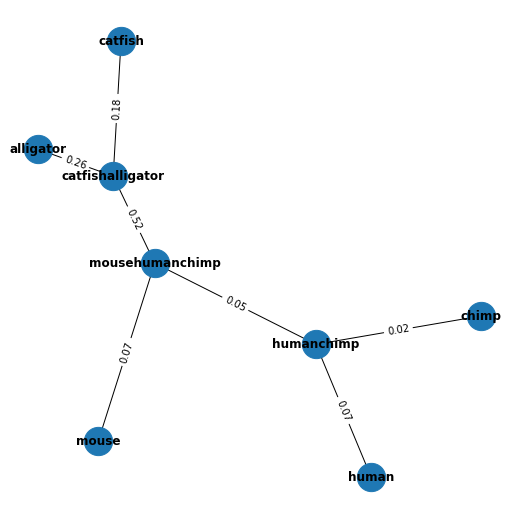

In [18]:
real_dist = np.zeros((len(real_taxa),len(real_taxa)))
for x in range(len(real_taxa)):
    for y in range(len(real_taxa)):
        if x==y:
            real_dist[x][y] = 0
            continue
        else:
            g,bg = NWA(real_taxa_data[x],real_taxa_data[y],1)
            real_dist[x][y] = (max(g.shape[0],g.shape[1])-g[g.shape[0]-1,g.shape[1]-1])/max(g.shape[0],g.shape[1])
print(real_dist)
RT = nx.Graph()
NJM(real_taxa,real_dist,RT)

In [ ]:
dist = np.array([[0, 12, 14, 14, 15],
                 [12, 0, 12, 12, 13],
                 [14, 12, 0, 6, 7],
                 [14, 12, 6, 0, 3],
                 [15, 13, 7, 3, 0]])
taxa = ["a","b","c","d","e"]
T = nx.Graph()

In [ ]:
def NJM(taxa,mtx,T):
    print(taxa)
    r_taxa = []
    for i in range(len(taxa)):
        res = 0
        for j in range(len(taxa)):
            res += mtx[i][j]
        r_taxa.append(res)
    print(r_taxa)
    print(mincomb(r_taxa,mtx))
    print("mingot")
    eye = mincomb(r_taxa,mtx)[0]
    jay = mincomb(r_taxa,mtx)[1]
    T.add_node(taxa[eye])
    T.add_node(taxa[jay])
    T.add_node(taxa[eye]+taxa[jay])
    if len(r_taxa)==2:
        T.remove_node(taxa[eye]+taxa[jay])
        print(mtx[eye][jay])
        plt.figure(figsize=(7,7))
        T.add_edge(taxa[eye], taxa[jay], weight= np.round(mtx[eye][jay],2))
        pos = nx.spring_layout(T)
        nx.draw(T, pos=pos, with_labels=True, node_size=800, font_weight='bold')
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
        return
    newmtx,disti,distj = merge(eye,jay,r_taxa,mtx)
    T.add_edge(taxa[eye], taxa[eye]+taxa[jay], weight= np.round(disti,2))
    T.add_edge(taxa[jay], taxa[eye]+taxa[jay], weight= np.round(distj,2))
    if newmtx.shape[0]>=2:
        NJM(np.append(np.delete(taxa,[eye,jay]),taxa[eye]+taxa[jay]),newmtx,T)

def mincomb(taxa,mtx):
    res = [math.inf,math.inf]
    thresh = math.inf
    for i in range(len(taxa)):
        for j in range(len(taxa)):
            if i==j:
                continue
            mini = mtx[i][j] - (taxa[i]+taxa[j])/(len(taxa)-2)
            if mini<thresh:
                thresh = mini
                res = [i,j]
    return res

def merge(i,j,taxa,mtx):
    distj = 0.5* (mtx[i][j]+(taxa[j]-taxa[i])/(len(taxa)-2))
    disti = 0.5* (mtx[i][j]+(taxa[i]-taxa[j])/(len(taxa)-2))
    
    print(disti,distj)
    
    newdists = []
    for x in range(mtx.shape[0]):
        if x!=i and x!=j:
            temp = (mtx[i][x]+mtx[j][x]-mtx[i][j])/2
            newdists.append(temp)
    newdists.append(0)
    
    umtx = np.zeros((mtx.shape[0]-1,mtx.shape[0]-1))
    umtx[mtx.shape[0]-2] = newdists
    for n in range(mtx.shape[0]-2):
        umtx[n][mtx.shape[0]-2] = newdists[n]
    umtx[:umtx.shape[0]-1,:umtx.shape[1]-1] = deleteMtx(i,j,mtx)
    print(umtx)
    return umtx,disti,distj
    
def deleteMtx(i,j,mtx):
    nmtx = np.delete(mtx,[i,j],0)
    nmtx = np.delete(nmtx,[i,j],1)
    np.delete(mtx,i,1)
    np.delete(mtx,j,0)
    np.delete(mtx,j,1)
    print(nmtx)
    return nmtx
    
            

In [ ]:
NJM(taxa,dist,T)

In [15]:
def NJM(taxa,mtx,T):
    print(taxa)
    r_taxa = []
    for i in range(len(taxa)):
        res = 0
        for j in range(len(taxa)):
            res += mtx[i][j]
        r_taxa.append(res)
    print(r_taxa)
    print(mincomb(r_taxa,mtx))
    print("mingot")
    eye = mincomb(r_taxa,mtx)[0]
    jay = mincomb(r_taxa,mtx)[1]
    T.add_node(taxa[eye])
    T.add_node(taxa[jay])
    T.add_node(taxa[eye]+taxa[jay])
    if len(r_taxa)==2:
        T.remove_node(taxa[eye]+taxa[jay])
        print(mtx[eye][jay])
        plt.figure(figsize=(7,7))
        T.add_edge(taxa[eye], taxa[jay], weight= np.round(mtx[eye][jay],2))
        pos = nx.spring_layout(T)
        nx.draw(T, pos=pos, with_labels=True, node_size=800, font_weight='bold')
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
        return
    newmtx,disti,distj = merge(eye,jay,r_taxa,mtx)
    T.add_edge(taxa[eye], taxa[eye]+taxa[jay], weight= np.round(disti,2))
    T.add_edge(taxa[jay], taxa[eye]+taxa[jay], weight= np.round(distj,2))
    if newmtx.shape[0]>=2:
        NJM(np.append(np.delete(taxa,[eye,jay]),taxa[eye]+taxa[jay]),newmtx,T)

def mincomb(taxa,mtx):
    res = [math.inf,math.inf]
    thresh = math.inf
    for i in range(len(taxa)):
        for j in range(len(taxa)):
            if i==j:
                continue
            mini = mtx[i][j] - (taxa[i]+taxa[j])/(len(taxa)-2)
            if mini<thresh:
                thresh = mini
                res = [i,j]
    return res

def merge(i,j,taxa,mtx):
    distj = 0.5* (mtx[i][j]+(taxa[j]-taxa[i])/(len(taxa)-2))
    disti = 0.5* (mtx[i][j]+(taxa[i]-taxa[j])/(len(taxa)-2))
    
    print(disti,distj)
    
    newdists = []
    for x in range(mtx.shape[0]):
        if x!=i and x!=j:
            temp = (mtx[i][x]+mtx[j][x]-mtx[i][j])/2
            newdists.append(temp)
    newdists.append(0)
    
    umtx = np.zeros((mtx.shape[0]-1,mtx.shape[0]-1))
    umtx[mtx.shape[0]-2] = newdists
    for n in range(mtx.shape[0]-2):
        umtx[n][mtx.shape[0]-2] = newdists[n]
    umtx[:umtx.shape[0]-1,:umtx.shape[1]-1] = deleteMtx(i,j,mtx)
    print(umtx)
    return umtx,disti,distj
    
def deleteMtx(i,j,mtx):
    nmtx = np.delete(mtx,[i,j],0)
    nmtx = np.delete(nmtx,[i,j],1)
    np.delete(mtx,i,1)
    np.delete(mtx,j,0)
    np.delete(mtx,j,1)
    print(nmtx)
    return nmtx
    
            

In [ ]:
NJM(taxa,dist,T)

In [46]:
def NJM(taxa,mtx,T):
    print(taxa)
    r_taxa = []
    for i in range(len(taxa)):
        res = 0
        for j in range(len(taxa)):
            res += mtx[i][j]
        r_taxa.append(res)
    print(r_taxa)
    print(mincomb(r_taxa,mtx))
    print("mingot")
    eye = mincomb(r_taxa,mtx)[0]
    jay = mincomb(r_taxa,mtx)[1]
    T.add_node(taxa[eye])
    T.add_node(taxa[jay])
    T.add_node(taxa[eye]+taxa[jay])
    if len(r_taxa)==2:
        T.remove_node(taxa[eye]+taxa[jay])
        print(mtx[eye][jay])
        plt.figure(figsize=(7,7))
        T.add_edge(taxa[eye], taxa[jay], weight= np.round(mtx[eye][jay],2))
        pos = nx.spring_layout(T)
        nx.draw(T, pos=pos, with_labels=True, node_size=800, font_weight='bold')
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
        return
    newmtx,disti,distj = merge(eye,jay,r_taxa,mtx)
    T.add_edge(taxa[eye], taxa[eye]+taxa[jay], weight= np.round(disti,2))
    T.add_edge(taxa[jay], taxa[eye]+taxa[jay], weight= np.round(distj,2))
    if newmtx.shape[0]>=2:
        NJM(np.append(np.delete(taxa,[eye,jay]),taxa[eye]+taxa[jay]),newmtx,T)

def mincomb(taxa,mtx):
    res = [math.inf,math.inf]
    thresh = math.inf
    for i in range(len(taxa)):
        for j in range(len(taxa)):
            if i==j:
                continue
            mini = mtx[i][j] - (taxa[i]+taxa[j])/(len(taxa)-2)
            if mini<thresh:
                thresh = mini
                res = [i,j]
    return res

def merge(i,j,taxa,mtx):
    distj = 0.5* (mtx[i][j]+(taxa[j]-taxa[i])/(len(taxa)-2))
    disti = 0.5* (mtx[i][j]+(taxa[i]-taxa[j])/(len(taxa)-2))
    
    print(disti,distj)
    
    newdists = []
    for x in range(mtx.shape[0]):
        if x!=i and x!=j:
            temp = (mtx[i][x]+mtx[j][x]-mtx[i][j])/2
            newdists.append(temp)
    newdists.append(0)
    
    umtx = np.zeros((mtx.shape[0]-1,mtx.shape[0]-1))
    umtx[mtx.shape[0]-2] = newdists
    for n in range(mtx.shape[0]-2):
        umtx[n][mtx.shape[0]-2] = newdists[n]
    umtx[:umtx.shape[0]-1,:umtx.shape[1]-1] = deleteMtx(i,j,mtx)
    print(umtx)
    return umtx,disti,distj
    
def deleteMtx(i,j,mtx):
    nmtx = np.delete(mtx,[i,j],0)
    nmtx = np.delete(nmtx,[i,j],1)
    np.delete(mtx,i,1)
    np.delete(mtx,j,0)
    np.delete(mtx,j,1)
    print(nmtx)
    return nmtx
    
            

In [ ]:
NJM(taxa,dist,T)

['a', 'b', 'c', 'd', 'e']
[55, 49, 39, 35, 38]
[0, 1]
mingot
7.0 5.0
[[0 6 7]
 [6 0 3]
 [7 3 0]]
[[0. 6. 7. 7.]
 [6. 0. 3. 7.]
 [7. 3. 0. 8.]
 [7. 7. 8. 0.]]
['c' 'd' 'e' 'ab']
[20.0, 16.0, 18.0, 22.0]
[0, 3]
mingot
3.0 4.0
[[0. 3.]
 [3. 0.]]
[[0. 3. 3.]
 [3. 0. 4.]
 [3. 4. 0.]]
['d' 'e' 'cab']
[6.0, 7.0, 7.0]
[0, 1]
mingot
1.0 2.0
[[0.]]
[[0. 2.]
 [2. 0.]]
['cab' 'de']
[2.0, 2.0]
[0, 1]
mingot
2.0


C:\Users\callu\Miniconda3\envs\CS904\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


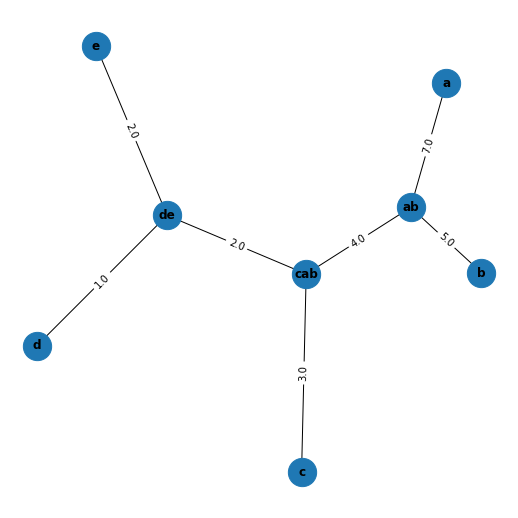